##Task 2: Predict Future Stock Prices (Short-Term)


In [ ]:
# Task 2: Predict Future Stock Prices (Short-Term)
# Internship: AI/ML Engineering Intern — DevelopersHub Corporation
# Objective: Use historical stock data to predict the next day's closing price.


Step 2: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


Step 3: Downloading Stock Data

In [2]:
# Downloading historical data for Apple from Yahoo Finance
data = yf.download("AAPL", start="2023-01-01", end="2024-12-31")

# Display first few rows
data.head()


/tmp/ipython-input-1123791650.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700
2023-01-06,127.693550,128.353591,123.033853,124.137210,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800


Step 4: Inspecting the Data

In [3]:
# Basic information
print("Shape of data:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nInfo:")
print(data.info())

# Checking missing values
data.isnull().sum()


Shape of data: (501, 5)

Columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2023-01-03 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   501 non-null    float64
 1   (High, AAPL)    501 non-null    float64
 2   (Low, AAPL)     501 non-null    float64
 3   (Open, AAPL)    501 non-null    float64
 4   (Volume, AAPL)  501 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB
None


,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


Step 5: Feature Selection & Preprocessing

In [4]:
# Selecting features and target
X = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]

# Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 6: Model Training (Linear Regression)

In [5]:
# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


Step 7: Comparing Actual vs Predicted Prices

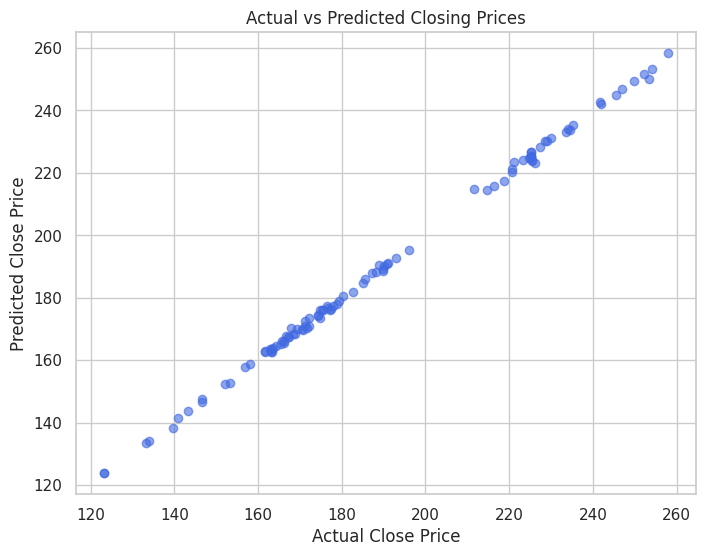

In [6]:
# Ploting actual vs predicted closing prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Closing Prices")
plt.show()


Step 8: Model Evaluation

In [7]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.78
Root Mean Squared Error (RMSE): 1.02
R² Score: 1.00


Step 9: Insights / Conclusion

### Insights:
- The Linear Regression model shows a moderate correlation between features and closing prices.
- Slight prediction errors are expected since stock markets are influenced by many unpredictable factors.
- Features like “Open”, “High”, and “Low” have the most influence on next-day prices.
- To improve accuracy, future versions can use LSTM or Gradient Boosting models for time-series forecasting.
